# Endangered Languages Exploration
## by Jean Pierre Simons Rondona

## Preliminary Wrangling

This dataset was published by The Guardian (<a href='https://www.theguardian.com/news/datablog/2011/apr/15/language-extinct-endangered#data'>here</a>). It aims to provide data insights on how many endangered languages there are in the World and what are the chances they will die out completely.

UNESCO provide a classification system to show just how 'in trouble' the language is:

* Vulnerable - most children speak the language, but it may be restricted to certain domains (e.g., home)
* Definitely endangered - children no longer learn the language as a 'mother tongue' in the home
* Severely endangered - language is spoken by grandparents and older generations; while the parent generation may understand it, they do not speak it to children or among themselves
* Critically endangered - the youngest speakers are grandparents and older, and they speak the language partially and infrequently
* Extinct - there are no speakers left

In addition, I also included information on World Population by country from Worldometer via Kaggle (<a href='https://www.kaggle.com/tanuprabhu/population-by-country-2020'>here</a>).

In the study below I intend to answer the following questions:
* What is the average amount of speakers in the world's endangered languages?
* Do the amount of speakers directly correlate to a languages likelihood of extinction?
* Does a language's world location impact it's likelihood of extinction?

In [482]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.api.types import CategoricalDtype

%matplotlib inline

In [483]:
# Load endangered languages data.
end_lang = pd.read_csv('data.csv')
end_lang.head(10)

,ID,Name in English,Name in French,Name in Spanish,Countries,Country codes alpha 3,ISO639-3 codes,Degree of endangerment,Alternate names,Name in the language,Number of speakers,Sources,Latitude,Longitude,Description of the location
0,1022,South Italian,italien du sud,napolitano-calabrés,Italy,ITA,nap,Vulnerable,Neapolitan; Neapolitan-Calabrese; неаполитанск...,NaN,7500000.0,NaN,40.9798,15.2490,"Campania, Lucania (Basilicata), Abruzzi (Abruz..."
1,1023,Sicilian,sicilien,siciliano,Italy,ITA,scn,Vulnerable,NaN,NaN,5000000.0,NaN,37.4399,14.5019,"Sicily (Sicilia), southern and central Calabri..."
2,383,Low Saxon,bas-saxon,bajo sajón,"Germany, Denmark, Netherlands, Poland, Russian...","DEU, DNK, NLD, POL, RUS","act, drt, frs, gos, nds, sdz, stl, twd, vel, wep",Vulnerable,"Low German, Niedersächsisch, Nedersaksisch, Ni...",Neddersassisch,4800000.0,NaN,53.4029,10.3601,"northern Germany, the north-eastern part of th..."
3,335,Belarusian,biélorusse,bielorruso,"Belarus, Latvia, Lithuania, Poland, Russian Fe...","BRB, LVA, LTU, POL, RUS, UKR",bel,Vulnerable,NaN,NaN,4000000.0,Hienadź Cychun: Weißrussisch. — Lexikon der Sp...,53.9560,27.5756,Belarus except the Polesian-speaking south-wes...
4,382,Lombard,lombard,lombardo,"Italy, Switzerland","ITA, CHE",lmo,Definitely endangered,NaN,NaN,3500000.0,NaN,45.7215,9.3273,the region of Lombardy (except the southernmos...
5,405,Romani,romani,romaní,"Albania, Germany, Austria, Belarus, Bosnia and...","ALB, DEU, AUT, BRB, BIH, BGR, HRV, EST, FIN, F...","rmc, rmf, rml, rmn, rmo, rmw, rmy",Definitely endangered,"sinti, vlax, calò",NaN,3500000.0,Yaron Matras: Romani: a linguistic introductio...,46.3165,22.3681,"many European countries, most densely in East-..."
6,2211,Yiddish (Israel),yiddish (Israël),yiddish (Israel),Israel,ISR,ydd,Definitely endangered,Judeo-German,NaN,3000000.0,Neil G. Jacobs: Yiddish: a linguistic introduc...,32.0833,34.8333,"most speakers now live outside Europe, mainly ..."
7,1586,Gondi,gondi,gondí,India,IND,gon,Vulnerable,Gondi; Gaudi; Gondiva; Gondwadi; Goondile; Gou...,NaN,2713790.0,NaN,19.5804,80.4418,"Madhya Pradesh (Betul, Chhindwara, Seoni, Mand..."
8,1020,Limburgian-Ripuarian,francique ripuaire -limbourgeois,limburgués-ripuarino,"Germany, Belgium, Netherlands","DEU, BEL, NLD","ksh, lim",Vulnerable,Colognian (dialect; in German: Kölsch),NaN,2600000.0,NaN,50.7781,6.0864,Limburg provinces in Belgium and the Netherlan...
9,1943,Quechua of Southern Bolivia,quechua bolivien du sud,quechua boliviano meridional,Bolivia (Plurinational State of),BOL,quh,Vulnerable,NaN,NaN,2300000.0,NaN,-18.0675,-65.7641,"Departments of Cochabamba, Chuquisaca, Potosí ..."


In [484]:
# Load the world population
pop = pd.read_csv('population_by_country_2020.csv')
pop.head(10)

,Country (or dependency),Country Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39%,5540090,153,9388211,-348399.0,1.7,38,61%,18.47%
1,India,1382345085,0.99%,13586631,464,2973190,-532687.0,2.2,28,35%,17.70%
2,United States,331341050,0.59%,1937734,36,9147420,954806.0,1.8,38,83%,4.25%
3,Indonesia,274021604,1.07%,2898047,151,1811570,-98955.0,2.3,30,56%,3.51%
4,Pakistan,221612785,2.00%,4327022,287,770880,-233379.0,3.6,23,35%,2.83%
5,Brazil,212821986,0.72%,1509890,25,8358140,21200.0,1.7,33,88%,2.73%
6,Nigeria,206984347,2.58%,5175990,226,910770,-60000.0,5.4,18,52%,2.64%
7,Bangladesh,164972348,1.01%,1643222,1265,130170,-369501.0,2.1,28,39%,2.11%
8,Russia,145945524,0.04%,62206,9,16376870,182456.0,1.8,40,74%,1.87%
9,Mexico,129166028,1.06%,1357224,66,1943950,-60000.0,2.1,29,84%,1.65%


In [485]:
end_lang.describe()

,ID,Number of speakers,Latitude,Longitude
count,2722.000000,2.539000e+03,2719.000000,2719.000000
mean,1362.501102,5.365890e+04,16.247853,22.266012
std,785.919949,3.114620e+05,23.241828,92.611293
min,2.000000,0.000000e+00,-55.002800,-174.197800
25%,682.250000,5.000000e+01,-2.705000,-69.180850
50%,1362.500000,8.000000e+02,15.658700,30.591400
75%,2042.750000,6.872000e+03,34.214050,102.366000
max,2724.000000,7.500000e+06,77.481500,179.187000


In [486]:
# Drop the columns that are not in English
end_lang = end_lang.drop(['Name in French','Name in Spanish','Alternate names', 'Name in the language'], axis=1)
# Drop redunant columns
end_lang = end_lang.drop(['Country codes alpha 3','ISO639-3 codes'], axis=1)

In [487]:
end_lang[end_lang['ID'].duplicated()]['ID'].count

<bound method Series.count of Series([], Name: ID, dtype: int64)>

In [488]:
# Split the Countries and Description of the location cell values into multiple rows
end_lang.head()

,ID,Name in English,Countries,Degree of endangerment,Number of speakers,Sources,Latitude,Longitude,Description of the location
0,1022,South Italian,Italy,Vulnerable,7500000.0,NaN,40.9798,15.2490,"Campania, Lucania (Basilicata), Abruzzi (Abruz..."
1,1023,Sicilian,Italy,Vulnerable,5000000.0,NaN,37.4399,14.5019,"Sicily (Sicilia), southern and central Calabri..."
2,383,Low Saxon,"Germany, Denmark, Netherlands, Poland, Russian...",Vulnerable,4800000.0,NaN,53.4029,10.3601,"northern Germany, the north-eastern part of th..."
3,335,Belarusian,"Belarus, Latvia, Lithuania, Poland, Russian Fe...",Vulnerable,4000000.0,Hienadź Cychun: Weißrussisch. — Lexikon der Sp...,53.9560,27.5756,Belarus except the Polesian-speaking south-wes...
4,382,Lombard,"Italy, Switzerland",Definitely endangered,3500000.0,NaN,45.7215,9.3273,the region of Lombardy (except the southernmos...


In [489]:
#Split & explode countries
end_lang['Countries'] = end_lang['Countries'].str.split(',')
end_lang = end_lang.explode('Countries')
#Split & explode Desription of the location
end_lang['Description of the location'] = end_lang['Description of the location'].str.split(',')
end_lang = end_lang.explode('Description of the location')

In [490]:
end_lang.shape

(6675, 9)

In [491]:
# Join the world population data with our main data set.
end_lang = end_lang.merge(pop, left_on='Countries', right_on='Country (or dependency)')

In [492]:
end_lang.shape

(4257, 20)

In [493]:
end_lang.head(100)

,ID,Name in English,Countries,Degree of endangerment,Number of speakers,Sources,Latitude,Longitude,Description of the location,Country (or dependency),Country Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1022,South Italian,Italy,Vulnerable,7500000.0,NaN,40.9798,15.2490,Campania,Italy,60446035,-0.15%,-88249,206,294140,148943.0,1.3,47,69%,0.78%
1,1022,South Italian,Italy,Vulnerable,7500000.0,NaN,40.9798,15.2490,Lucania (Basilicata),Italy,60446035,-0.15%,-88249,206,294140,148943.0,1.3,47,69%,0.78%
2,1022,South Italian,Italy,Vulnerable,7500000.0,NaN,40.9798,15.2490,Abruzzi (Abruzzo),Italy,60446035,-0.15%,-88249,206,294140,148943.0,1.3,47,69%,0.78%
3,1022,South Italian,Italy,Vulnerable,7500000.0,NaN,40.9798,15.2490,Molise,Italy,60446035,-0.15%,-88249,206,294140,148943.0,1.3,47,69%,0.78%
4,1022,South Italian,Italy,Vulnerable,7500000.0,NaN,40.9798,15.2490,northern Calabria,Italy,60446035,-0.15%,-88249,206,294140,148943.0,1.3,47,69%,0.78%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1596,East Franconian,Germany,Vulnerable,NaN,http://vmf.i-iter.org/,50.0571,10.7336,Germany; formerly also in a small area north ...,Germany,83830972,0.32%,266897,240,348560,543822.0,1.6,46,76%,1.07%
96,1596,East Franconian,Germany,Vulnerable,NaN,http://vmf.i-iter.org/,50.0571,10.7336,Czech Republic; both the region and the class...,Germany,83830972,0.32%,266897,240,348560,543822.0,1.6,46,76%,1.07%
97,1478,Rhenish Franconian,Germany,Vulnerable,NaN,NaN,49.4467,8.2067,most parts of Rhineland-Palatinate and Hesse,Germany,83830972,0.32%,266897,240,348560,543822.0,1.6,46,76%,1.07%
98,1478,Rhenish Franconian,Germany,Vulnerable,NaN,NaN,49.4467,8.2067,the east and south of Saarland,Germany,83830972,0.32%,266897,240,348560,543822.0,1.6,46,76%,1.07%


In [494]:
# Remove records where the number of speakers is not specified since we are not interested in those.
# Number of records with null "Number of speakers"
end_lang[end_lang['Number of speakers'].isnull()]['ID'].count()

263

In [495]:
end_lang = end_lang[end_lang['Number of speakers'].notnull()]
# Verify all those records were removed
end_lang[end_lang['Number of speakers'].isnull()]['ID'].count()

0

In [496]:
#Modify "Number of speakers" to integer
end_lang.astype({'Number of speakers': 'int32'})

,ID,Name in English,Countries,Degree of endangerment,Number of speakers,Sources,Latitude,Longitude,Description of the location,Country (or dependency),Country Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1022,South Italian,Italy,Vulnerable,7500000,NaN,40.9798,15.2490,Campania,Italy,60446035,-0.15%,-88249,206,294140,148943.0,1.3,47,69%,0.78%
1,1022,South Italian,Italy,Vulnerable,7500000,NaN,40.9798,15.2490,Lucania (Basilicata),Italy,60446035,-0.15%,-88249,206,294140,148943.0,1.3,47,69%,0.78%
2,1022,South Italian,Italy,Vulnerable,7500000,NaN,40.9798,15.2490,Abruzzi (Abruzzo),Italy,60446035,-0.15%,-88249,206,294140,148943.0,1.3,47,69%,0.78%
3,1022,South Italian,Italy,Vulnerable,7500000,NaN,40.9798,15.2490,Molise,Italy,60446035,-0.15%,-88249,206,294140,148943.0,1.3,47,69%,0.78%
4,1022,South Italian,Italy,Vulnerable,7500000,NaN,40.9798,15.2490,northern Calabria,Italy,60446035,-0.15%,-88249,206,294140,148943.0,1.3,47,69%,0.78%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,1315,Bom,Sierra Leone,Severely endangered,20,Tucker Childs,7.3188,-11.9915,NaN,Sierra Leone,8004158,2.10%,163768,111,72180,-4200.0,4.3,19,43%,0.10%
4246,1316,Kim,Sierra Leone,Critically endangered,20,Tucker Childs,7.2425,-11.9476,NaN,Sierra Leone,8004158,2.10%,163768,111,72180,-4200.0,4.3,19,43%,0.10%
4247,1295,Mo-peng,Sierra Leone,Extinct,0,Tucker Childs,7.4714,-12.2607,NaN,Sierra Leone,8004158,2.10%,163768,111,72180,-4200.0,4.3,19,43%,0.10%
4248,1314,Sei,Sierra Leone,Extinct,0,Tucker Childs,7.5857,-12.5354,NaN,Sierra Leone,8004158,2.10%,163768,111,72180,-4200.0,4.3,19,43%,0.10%


In [497]:
end_lang.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3994 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           3994 non-null   int64  
 1   Name in English              3994 non-null   object 
 2   Countries                    3994 non-null   object 
 3   Degree of endangerment       3994 non-null   object 
 4   Number of speakers           3994 non-null   float64
 5   Sources                      3110 non-null   object 
 6   Latitude                     3989 non-null   float64
 7   Longitude                    3989 non-null   float64
 8   Description of the location  3357 non-null   object 
 9   Country (or dependency)      3994 non-null   object 
 10  Country Population (2020)    3994 non-null   int64  
 11  Yearly Change                3994 non-null   object 
 12  Net Change                   3994 non-null   int64  
 13  Density (P/Km²)   

In [498]:
end_lang.describe()

,ID,Number of speakers,Latitude,Longitude,Country Population (2020),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net)
count,3994.000000,3.994000e+03,3989.000000,3989.000000,3.994000e+03,3.994000e+03,3994.000000,3.994000e+03,3981.000000
mean,1335.530796,1.088145e+05,14.102519,19.337673,2.779428e+08,2.332879e+06,121.401602,2.566033e+06,-56711.102738
std,735.317411,4.749976e+05,21.332756,85.273909,4.783391e+08,3.919884e+06,147.785086,3.102428e+06,196690.930544
min,2.000000,0.000000e+00,-55.002800,-171.820600,1.360000e+03,-3.838400e+05,2.000000,1.000000e+01,-532687.000000
25%,718.000000,2.000000e+02,-3.184300,-69.500000,1.797138e+07,1.709150e+05,25.000000,3.095000e+05,-60000.000000
50%,1287.500000,2.100000e+03,15.691700,22.243100,5.097625e+07,6.550840e+05,66.000000,1.280000e+06,-800.000000
75%,1866.750000,2.861500e+04,27.926400,93.235400,2.128220e+08,1.509890e+06,153.000000,2.973190e+06,36400.000000
max,2722.000000,7.500000e+06,69.533300,179.187000,1.440298e+09,1.358663e+07,1265.000000,9.388211e+06,543822.000000


### Dataset Structure

> There are 2722 different endangered languages in this dataset with 7 features (name, countries, degree of endangerment, # of speakers, sources, latitude, longitude, description of the location). There are both categorical and numerical variables with one key ordered variable, endangerment:

> Less Critical -> Most Critical
> * Vulnerable - most children speak the language, but it may be restricted to certain domains (e.g., home)
> * Definitely endangered - children no longer learn the language as a 'mother tongue' in the home
> * Severely endangered - language is spoken by grandparents and older generations; while the parent generation may understand it, they do not speak it to children or among themselves
> * Critically endangered - the youngest speakers are grandparents and older, and they speak the language partially and infrequently
> * Extinct - there are no speakers left

### Points of interest

> The key areas of interest is the factors correlated to a languages degree of endangerment.

> I expect the countries population demographics, total number of remaining speakers along with the location to be the main factors correlated to a critically endangered language.

## Univariate Exploration

Start with the distribution of # of speakers.

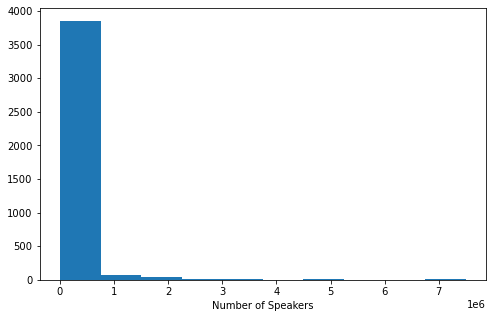

In [499]:
# First let's look at a standard histogram of the number of speakers variable.
plt.figure(figsize=[8,5])
plt.hist(data = end_lang, x = 'Number of speakers')
plt.xlabel('Number of Speakers')
plt.show()


In [500]:
# Let's try a logarithmic distribution to see if we can get more insights
np.log10(end_lang['Number of speakers'].describe())

C:\Users\JPSIMONS\anaconda3\envs\my_env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    3.601408
mean     5.036687
std      5.676691
min          -inf
25%      2.301030
50%      3.322219
75%      4.456594
max      6.875061
Name: Number of speakers, dtype: float64

In [501]:
# There are some languages where the # of speakers = 0.
# let's exclude them from the data set for now to see achieve a logarithmic distribution.
# New dataset for non extinct languages.
non_extinct = end_lang[end_lang['Number of speakers'] > 0]

In [502]:
np.log10(non_extinct['Number of speakers'].describe())

count    3.574147
mean     5.063948
std      5.689586
min      0.000000
25%      2.544068
50%      3.477121
75%      4.477121
max      6.875061
Name: Number of speakers, dtype: float64

Text(0, 0.5, 'Number of Endangered Languages')

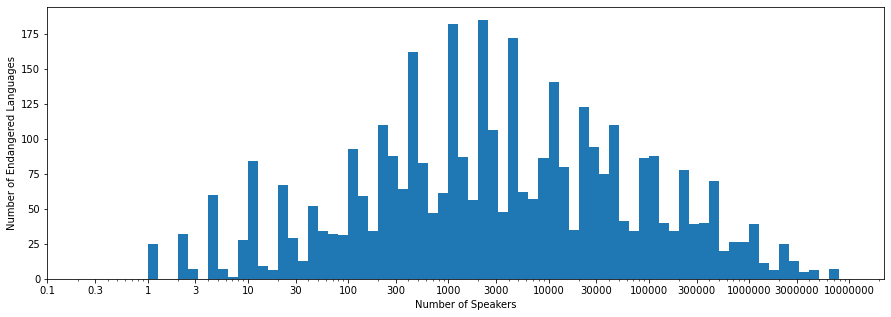

In [503]:
plt.figure(figsize=[15,5])
# Set bin size. The min is set to 0 since we don't need to take into account extinct languages
bins = 10 ** np.arange(0, 7+0.1, 0.1)
# Modify the ticks to make the x-axis more readable
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000,3000,10000,30000, 100000, 300000, 1000000, 3000000, 10000000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = non_extinct, x = 'Number of speakers', bins=bins);
# Apply  a logarithmic axis scale
plt.xscale('log')
# Apply the ticks we defined to our plot
plt.xticks(ticks,labels);
# Apply x-axis label
plt.xlabel('Number of Speakers')
plt.ylabel('Number of Endangered Languages')

As you can see above, a standard plot was very right skewed so I opted to create a logarithmic distribution instead. You will notice that there were several languages (243) that had 0 speakers (i.e they were technically extinct). I removed these records since they would impact the logarithmic distribution. Once that was done, you can see that most endangered languages have a range of 300 - 10,000 speakers.


In [504]:
# Now let's go back and see how many were extinct
end_lang[end_lang['Number of speakers'] == 0]['ID'].count()


243

Now let's see in what shape the endangered languages of the world are with a distribution for "Degree of Endangerment".

Text(0, 0.5, 'Number of Languages')

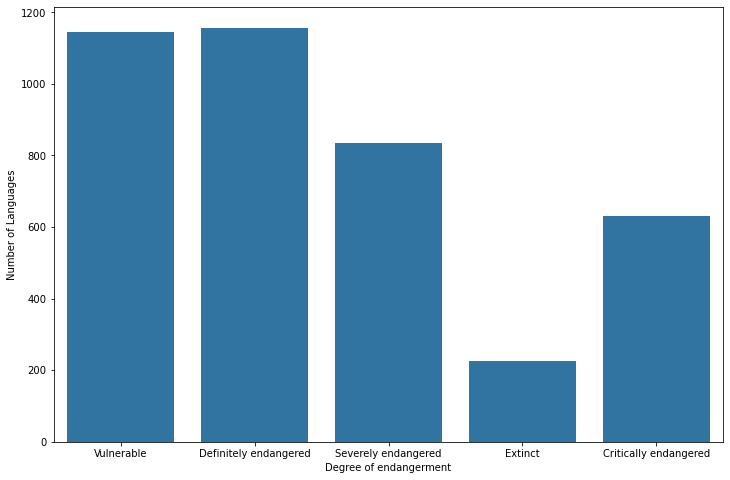

In [505]:
plt.figure(figsize=[12,8])
base_color = sb.color_palette()[0]
sb.countplot(data=end_lang, x='Degree of endangerment', color=base_color, linewidth=False)
plt.ylabel('Number of Languages')

All though the scenario is still grim, out of all the endangered languages the bulk of them are not critically endangered or extinct.


## Bivariate Exploration

Now we want to determine any correlations between the degree of endangerment and number speakers.

In [506]:
#Let's make the "Degree of endangerment" column categorical in order to for them to appear in degree of criticality
end_lang['Degree of endangerment']


0                  Vulnerable
1                  Vulnerable
2                  Vulnerable
3                  Vulnerable
4                  Vulnerable
                ...          
4245      Severely endangered
4246    Critically endangered
4247                  Extinct
4248                  Extinct
4249                  Extinct
Name: Degree of endangerment, Length: 3994, dtype: object

In [507]:
end_cats = ['Vulnerable','Definitely endangered','Severely endangered','Critically endangered','Extinct']
cat_type = CategoricalDtype(categories=end_cats, ordered=True)
end_lang['Degree of endangerment'] = end_lang['Degree of endangerment'].astype(cat_type)

Text(0, 0.5, 'Number of Speakers')

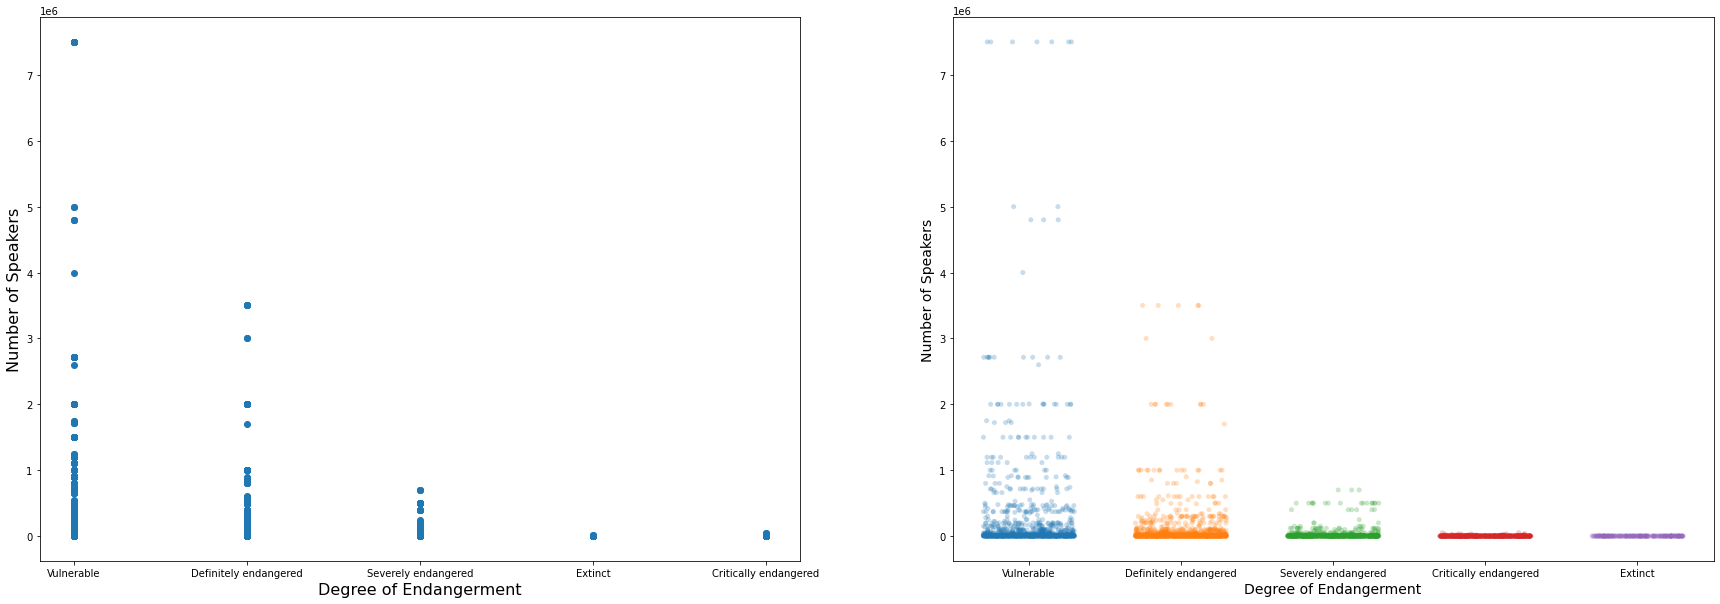

In [508]:
# Plot scatter plot between Number of Speakers and Degree of endangerment
plt.figure(figsize = [30,10])
plt.subplot(1,2,1)
plt.scatter(data = end_lang, x='Degree of endangerment', y='Number of speakers');
plt.xlabel('Degree of Endangerment',fontsize=16);
plt.ylabel('Number of Speakers',fontsize=16)

plt.subplot(1,2,2)
sb.stripplot(data = end_lang, x='Degree of endangerment', y='Number of speakers', jitter=0.3, alpha=0.25);
plt.xlabel('Degree of Endangerment', fontsize=14)
plt.ylabel('Number of Speakers',fontsize=14)


Based on the graph on the left you would be inclined to think that for the first 3 degrees there are 1000s of speakers left but this is not the case. The graph on the left shows us the concentration of speakers is far below 1000 for all degrees (darker = more concentrated). Let's see how this looks once we zoom in a bit more. Let's try filtering outlanguages with more than 3000 speakers first.

Text(0, 0.5, 'Number of Speakers')

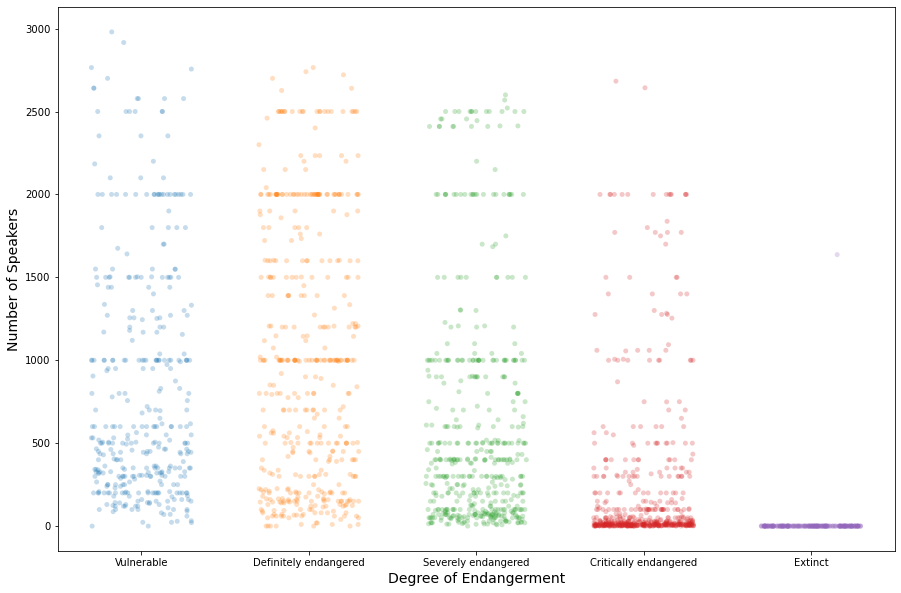

In [509]:
# Filter out Number of Speakers > 3000
end_lang2 = end_lang[end_lang['Number of speakers'] < 3000]
plt.figure(figsize = [15,10])
sb.stripplot(data = end_lang2, x='Degree of endangerment', y='Number of speakers', jitter=0.3, alpha=0.25);
plt.xlabel('Degree of Endangerment', fontsize=14)
plt.ylabel('Number of Speakers',fontsize=14)

Now we see a much better distribution! As expected, the critically endangered languages for the most part, have very few speakers left (< 500), and the higher the degree of endangerment, the lower the amount of speakers left.

## Multivariate Exploration

Now let's see if we can bring the country/location into the picture to see if there is any correlation.

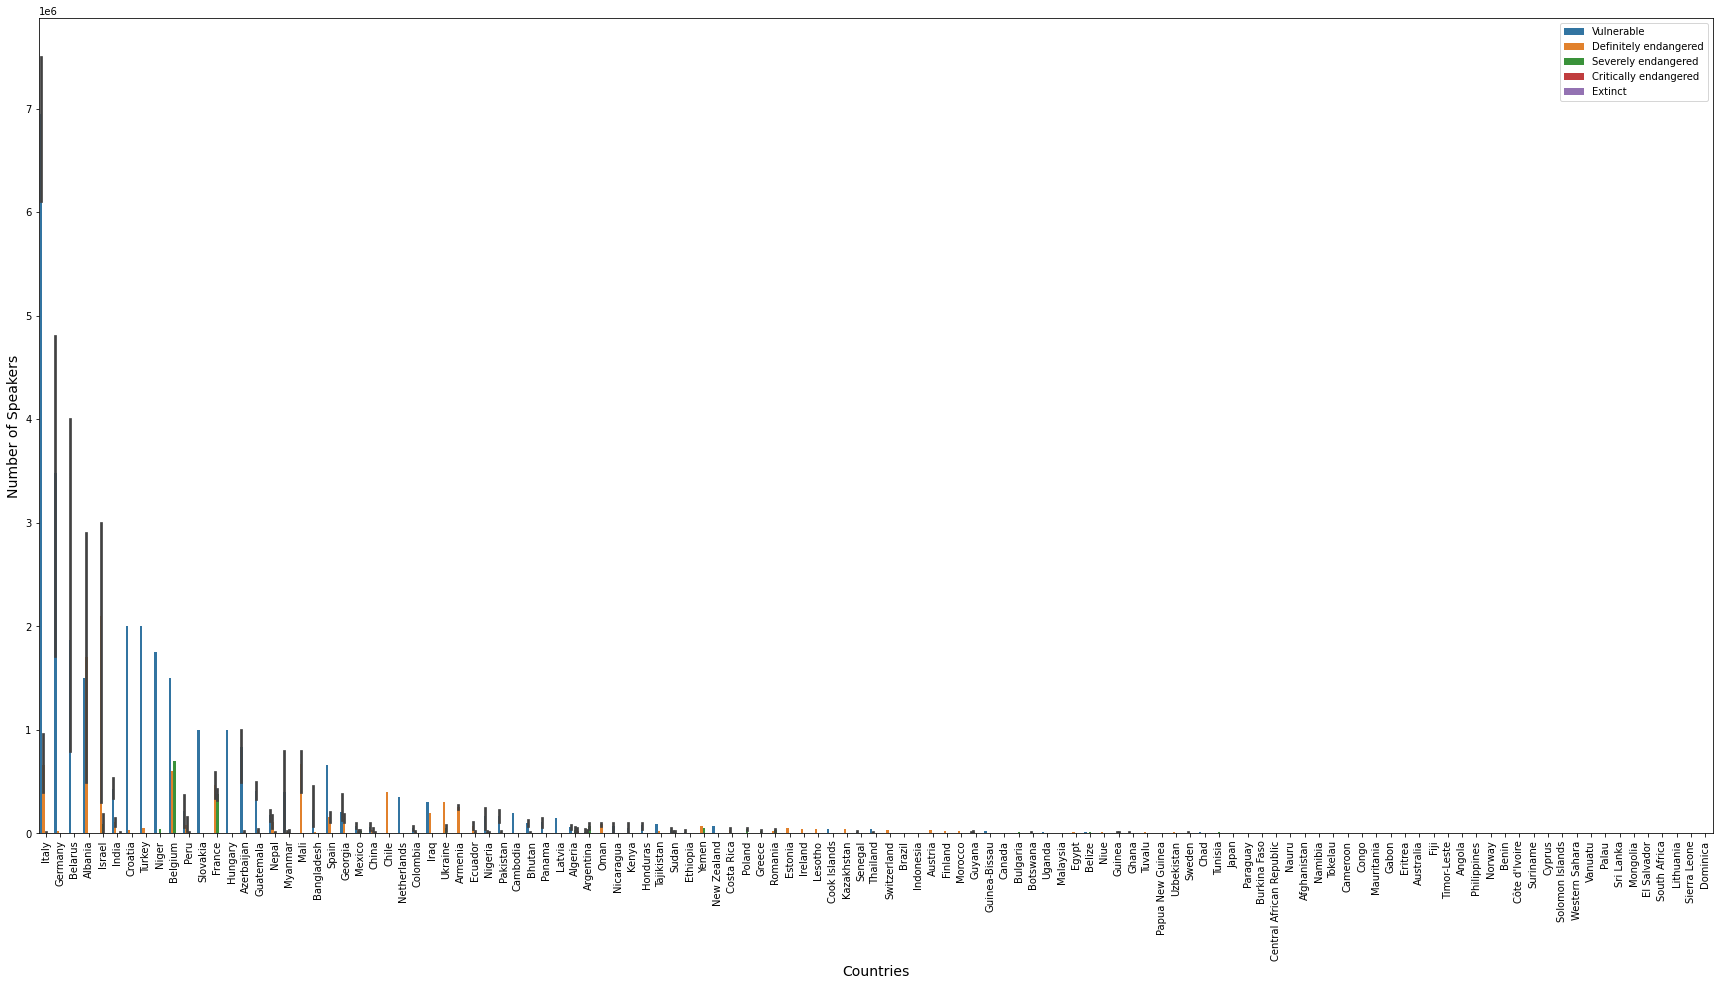

In [510]:
#plt.scatter(data = end_lang, x='Country_Population_(2020)', y='Number_of_speakers', s='Degree_of_endangerment')
plt.figure(figsize = [30,15])
ax = sb.barplot(data = end_lang, x = 'Countries', y = 'Number of speakers', hue = 'Degree of endangerment')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'cat_var2')
plt.xticks(rotation=90)
plt.ylabel('Number of Speakers',fontsize=14)
plt.xlabel('Countries', fontsize=14)
plt.legend(loc='upper right')

There are just too many countries for us to get a meaninful graph on the data. Let's look at the correlation between the countries population/number of endangered speakers and degree of endangerment. For readability purposes let's check the top 5 most/least populated countries to see if there is a correlation.

In [511]:
#Let's fetch the top 10 countries with the highest population.
top_ten = end_lang.sort_values('Country Population (2020)').drop_duplicates('Country Population (2020)')['Country Population (2020)'].tail(10)
top_ten

2576     115434444
3851     126407422
1438     129166028
1159     164972348
2130     206984347
2832     212821986
2192     221612785
3145     274021604
322     1382345085
1808    1440297825
Name: Country Population (2020), dtype: int64

In [512]:
top_ten_df = end_lang[end_lang['Country Population (2020)'].isin(top_ten)]
top_ten_df

,ID,Name in English,Countries,Degree of endangerment,Number of speakers,Sources,Latitude,Longitude,Description of the location,Country (or dependency),Country Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
154,1586,Gondi,India,Vulnerable,2713790.0,NaN,19.5804,80.4418,Madhya Pradesh (Betul,India,1382345085,0.99%,13586631,464,2973190,-532687.0,2.2,28,35%,17.70%
155,1586,Gondi,India,Vulnerable,2713790.0,NaN,19.5804,80.4418,Chhindwara,India,1382345085,0.99%,13586631,464,2973190,-532687.0,2.2,28,35%,17.70%
156,1586,Gondi,India,Vulnerable,2713790.0,NaN,19.5804,80.4418,Seoni,India,1382345085,0.99%,13586631,464,2973190,-532687.0,2.2,28,35%,17.70%
157,1586,Gondi,India,Vulnerable,2713790.0,NaN,19.5804,80.4418,Mandla,India,1382345085,0.99%,13586631,464,2973190,-532687.0,2.2,28,35%,17.70%
158,1586,Gondi,India,Vulnerable,2713790.0,NaN,19.5804,80.4418,Balaghat),India,1382345085,0.99%,13586631,464,2973190,-532687.0,2.2,28,35%,17.70%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300,2612,Te'un (Te'un Island),Indonesia,Extinct,0.0,"Wurm, Stephen A. 2007. 'Australia and the Paci...",-6.9809,129.1394,from Te'un Island,Indonesia,274021604,1.07%,2898047,151,1811570,-98955.0,2.3,30,56%,3.51%
3301,2612,Te'un (Te'un Island),Indonesia,Extinct,0.0,"Wurm, Stephen A. 2007. 'Australia and the Paci...",-6.9809,129.1394,South Maluku,Indonesia,274021604,1.07%,2898047,151,1811570,-98955.0,2.3,30,56%,3.51%
3302,2612,Te'un (Te'un Island),Indonesia,Extinct,0.0,"Wurm, Stephen A. 2007. 'Australia and the Paci...",-6.9809,129.1394,because of volcanic activities,Indonesia,274021604,1.07%,2898047,151,1811570,-98955.0,2.3,30,56%,3.51%
3851,1980,Hachijō,Japan,Definitely endangered,8000.0,Akihiro Kaneda: The tense-aspect system and ev...,33.1100,139.7891,the Hachijō and Aogashima Islands of the Izu A...,Japan,126407422,-0.30%,-383840,347,364555,71560.0,1.4,48,92%,1.62%


In [513]:
# Let's fetch the 10 countries with the least population in the world.
bottom_ten = end_lang.sort_values('Country Population (2020)').drop_duplicates('Country Population (2020)')['Country Population (2020)'].head(10)
bottom_ten

3914      1360
3588      1628
3875     10836
3603     11817
2687     17567
4214     18109
4249     72017
4162    308337
3575    398845
4124    587541
Name: Country Population (2020), dtype: int64

In [514]:
bottom_ten_df = end_lang[end_lang['Country Population (2020)'].isin(bottom_ten)]
bottom_ten_df

,ID,Name in English,Countries,Degree of endangerment,Number of speakers,Sources,Latitude,Longitude,Description of the location,Country (or dependency),Country Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
2683,704,Rarotongan,Cook Islands,Vulnerable,43000.0,Grimes 2000,-21.2343,-159.7837,16800 in Cook Islands,Cook Islands,17567,0.09%,16,73,240,NaN,N.A.,N.A.,75%,0.00%
2684,704,Rarotongan,Cook Islands,Vulnerable,43000.0,Grimes 2000,-21.2343,-159.7837,remainder mainly in New Zealand,Cook Islands,17567,0.09%,16,73,240,NaN,N.A.,N.A.,75%,0.00%
2685,709,Manihiki,Cook Islands,Definitely endangered,5000.0,Grimes 2000,-10.4000,-161.0000,Rakahanga and Manihiki Islands,Cook Islands,17567,0.09%,16,73,240,NaN,N.A.,N.A.,75%,0.00%
2686,710,Pukapukan,Cook Islands,Definitely endangered,840.0,Grimes 2000,-10.8710,-165.8441,Pukapuka and Nasau Islands,Cook Islands,17567,0.09%,16,73,240,NaN,N.A.,N.A.,75%,0.00%
2687,2623,Penrhyn,Cook Islands,Severely endangered,600.0,"Wurm, Stephen A. 2007. 'Australia and the Paci...",-9.0153,-158.0218,Penrhyn Island,Cook Islands,17567,0.09%,16,73,240,NaN,N.A.,N.A.,75%,0.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4212,2642,Ifo,Vanuatu,Extinct,0.0,"Wurm, Stephen A. 2007. 'Australia and the Paci...",-18.6605,169.1434,Northeastern Erromanga Island,Vanuatu,308337,2.42%,7263,25,12190,120.0,3.8,21,24%,0.00%
4213,2647,Maragus,Vanuatu,Extinct,0.0,"Wurm, Stephen A. 2007. 'Australia and the Paci...",-16.0405,167.2778,Central North Malekula Island,Vanuatu,308337,2.42%,7263,25,12190,120.0,3.8,21,24%,0.00%
4214,716,Sonsorol,Palau,Severely endangered,600.0,Grimes 2000,7.4278,134.5495,Palau Islands,Palau,18109,0.48%,86,39,460,NaN,N.A.,N.A.,N.A.,0.00%
4215,2263,Tobian,Palau,Critically endangered,22.0,Grimes 2000,2.9594,131.8084,Tabi (Hatobohei) Island,Palau,18109,0.48%,86,39,460,NaN,N.A.,N.A.,N.A.,0.00%


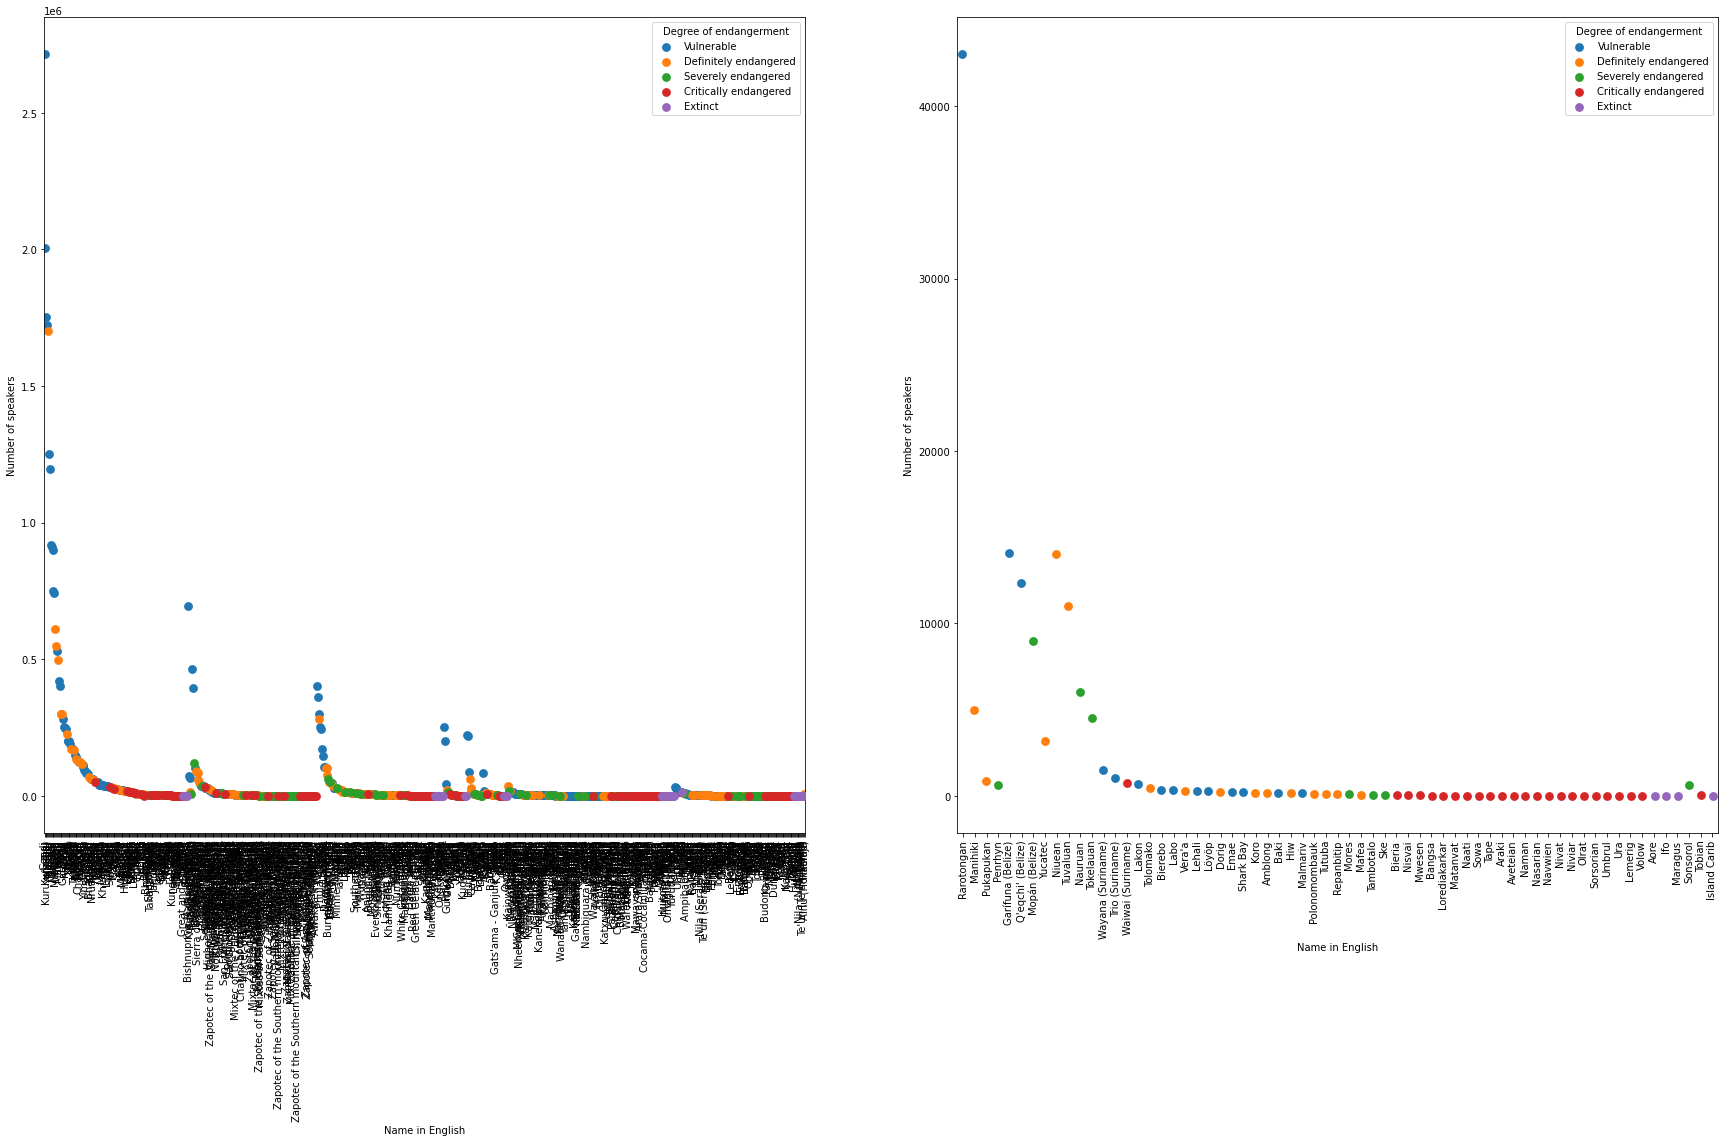

In [515]:
# Plot the data for both top ten and botton ten next to each other
plt.figure(figsize = [30,15])
#Top 10 Most populated
plt.subplot(1,2,1)
sb.pointplot(data=top_ten_df, x = 'Name in English', y = 'Number of speakers', hue = 'Degree of endangerment',
             ci = 'sd', linestyles = "", dodge = True);
plt.xticks(rotation = 90);
#Top 10 least populated
plt.subplot(1,2,2)
sb.pointplot(data=bottom_ten_df, x = 'Name in English', y = 'Number of speakers', hue = 'Degree of endangerment',
             ci = 'sd', linestyles = "", dodge = True);
plt.xticks(rotation = 90);


Looks like there is a very large volume of languages in the top 10 most populous countries, which has made our left graph practically unreadable. Let's devide the data into hemisphere quadrants to determine where the highest volume of endangered languages is located.

In [ ]:
# Create a hemisphere quadrant column
end_lang['Hemisphere Quadrant'] = ''
end_lang['Hemisphere Quadrant'][(end_lang['Latitude'] > 0) & (end_lang['Longitude'] < 0)] = 'North Western'
end_lang['Hemisphere Quadrant'][(end_lang['Latitude'] > 0) & (end_lang['Longitude'] > 0)] = 'North Eastern'
end_lang['Hemisphere Quadrant'][(end_lang['Latitude'] < 0) & (end_lang['Longitude'] < 0)] = 'South Western'
end_lang['Hemisphere Quadrant'][(end_lang['Latitude'] < 0) & (end_lang['Longitude'] > 0)] = 'South Eastern'

In [517]:
end_lang[end_lang['Hemisphere Quadrant'] == '']

,ID,Name in English,Countries,Degree of endangerment,Number of speakers,Sources,Latitude,Longitude,Description of the location,Country (or dependency),...,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Hemisphere Quadrant
1902,2057,Romani (Colombia),Colombia,Vulnerable,4858.0,Colombia Una Nación Multicultural. DANE. 2007,NaN,NaN,Se ubican en los departamentos de Atlántico y ...,Colombia,...,1.08%,543448,46,1109500,204796.0,1.8,31,80%,0.65%,
1903,2057,Romani (Colombia),Colombia,Vulnerable,4858.0,Colombia Una Nación Multicultural. DANE. 2007,NaN,NaN,Norte de Santander y Santander en la frontera...,Colombia,...,1.08%,543448,46,1109500,204796.0,1.8,31,80%,0.65%,
1904,2057,Romani (Colombia),Colombia,Vulnerable,4858.0,Colombia Una Nación Multicultural. DANE. 2007,NaN,NaN,en Bogotá D.C. y en el suroccidente de Colomb...,Colombia,...,1.08%,543448,46,1109500,204796.0,1.8,31,80%,0.65%,
2275,1904,Dorasque,Panama,Extinct,0.0,Ethnologue,NaN,NaN,NaN,Panama,...,1.61%,68328,58,74340,11200.0,2.5,30,68%,0.06%,
3076,1629,Arapáso,Brazil,Extinct,0.0,"Databank Moore, 2008.",0.0,-66.0,NaN,Brazil,...,0.72%,1509890,25,8358140,21200.0,1.7,33,88%,2.73%,
4205,2154,Umbrul,Vanuatu,Critically endangered,5.0,Lynch & Crowley 2001,NaN,NaN,Malekula,Vanuatu,...,2.42%,7263,25,12190,120.0,3.8,21,24%,0.00%,


Let's exclude the records without coordinates or that fall directly on the equator/greenwich line

In [518]:
end_lang = end_lang[end_lang['Hemisphere Quadrant'] != '']

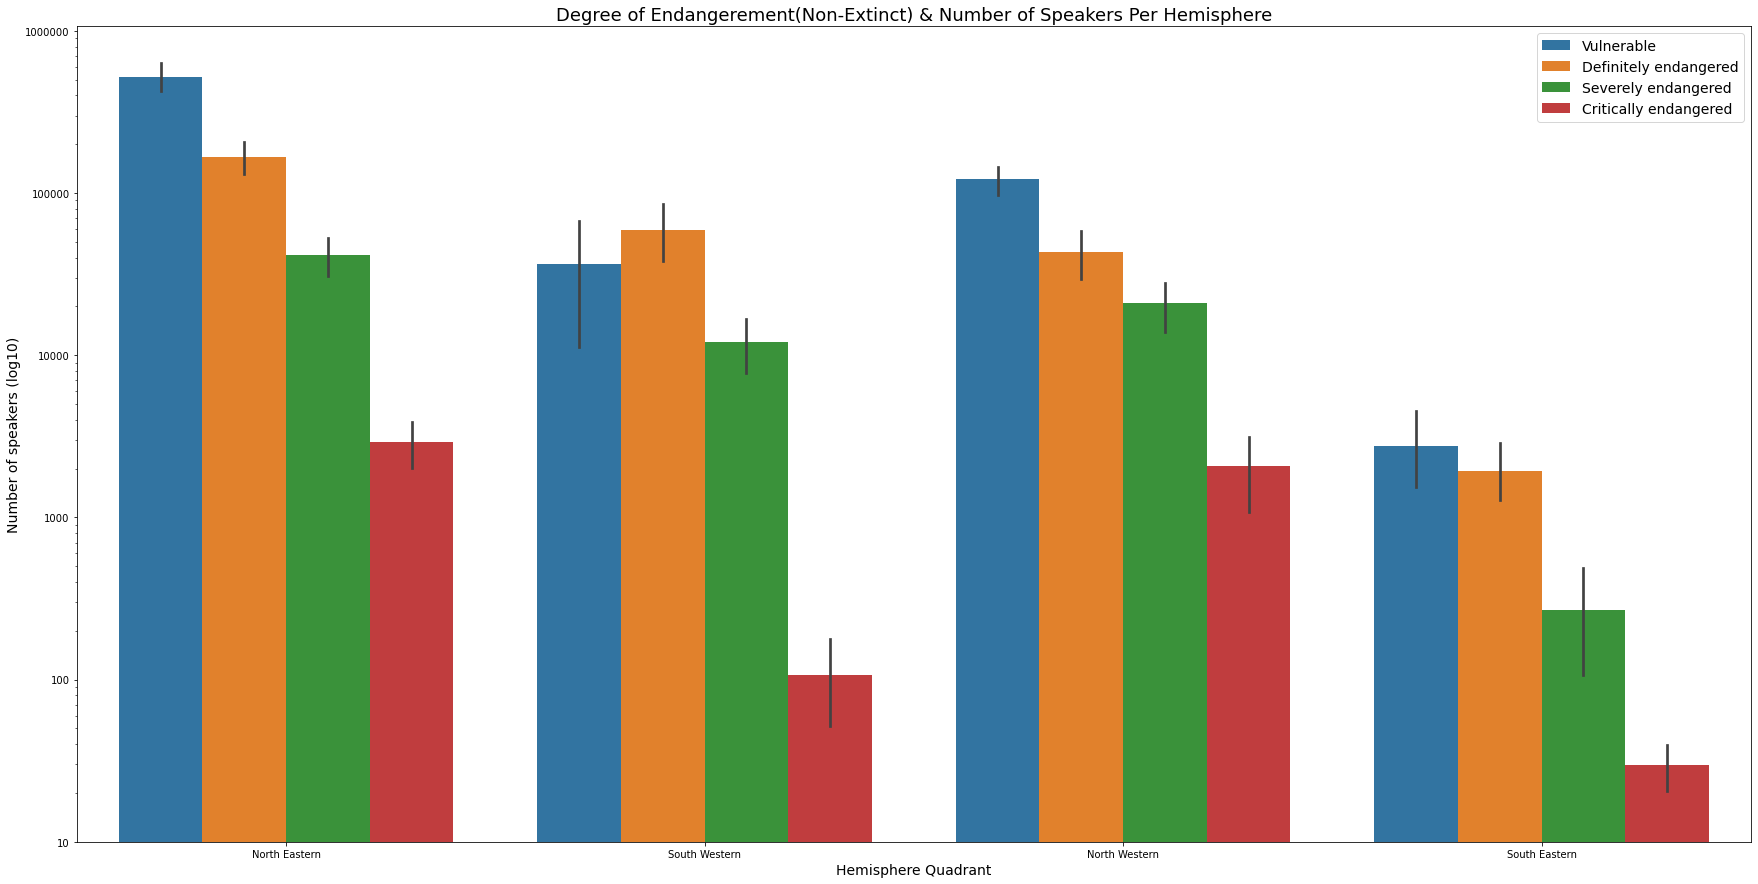

In [553]:
plt.figure(figsize = [30,15])
# Let's plot a barchart for non-extinct degrees of endagerment (since we won't be able to use a logarithmic scale if we include those)
non_extinct = end_lang[end_lang['Degree of endangerment'] != 'Extinct']
#Reset the categories to exclude "Extinct"
end_cats = ['Vulnerable','Definitely endangered','Severely endangered','Critically endangered']
cat_type = CategoricalDtype(categories=end_cats, ordered=True)
non_extinct['Degree of endangerment'] = non_extinct['Degree of endangerment'].astype(cat_type)

#Plot graph
ax = sb.barplot(data= non_extinct, x = 'Hemisphere Quadrant', y = 'Number of speakers', hue = 'Degree of endangerment');
plt.yscale('log')
plt.ylabel('Number of speakers (log10)', fontsize=14)
plt.xlabel('Hemisphere Quadrant', fontsize=14)
ticks = [10,100, 1000, 10000,100000,1000000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks,labels);
plt.title('Degree of Endangerement(Non-Extinct) & Number of Speakers Per Hemisphere', fontsize=18)
plt.legend(fontsize=14)


Now we've got some better insights from the grap above. It looks like the North Eastern hemisphere has the speakers per endangered language. This could be due to the fact that China and India are very densely populated countries.

In addition we can see that the South Eastern and South Western hemispheres have the least amount of speakers per critically endangered language. More research is needed but perhaps the fact that both of these areas were heavily colonized has an impact on these numbers. 

Text(0.5, 1.0, 'Degree of Endangerement(Non-Extinct) & Number of Speakers Per Hemisphere')

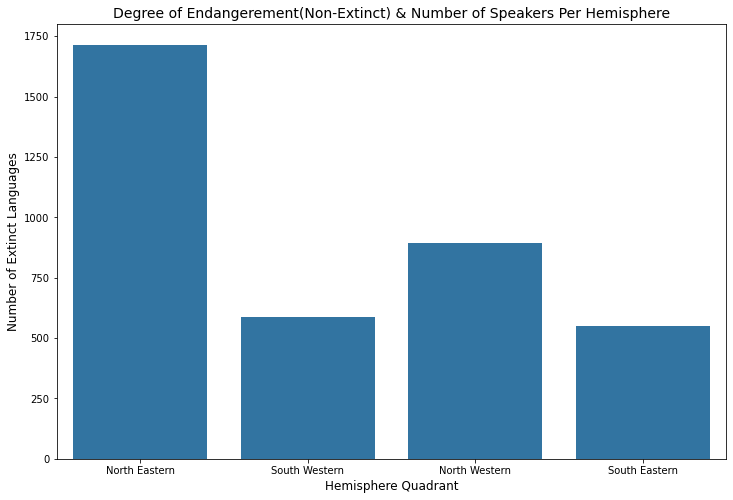

In [552]:
#Now let's see the distribution of extinct languages by hemisphere.
extinct = end_lang[end_lang['Degree of endangerment'] == 'Extinct']
#Reset the categories to exclude "Extinct"
end_cats = ['Extinct']
cat_type = CategoricalDtype(categories=end_cats, ordered=True)
extinct['Degree of endangerment'] = extinct['Degree of endangerment'].astype(cat_type)

#Plot graph
plt.figure(figsize=[12,8])
base_color = sb.color_palette()[0]
sb.countplot(data=end_lang, x='Hemisphere Quadrant', color=base_color, linewidth=False)
plt.ylabel('Number of Extinct Languages', fontsize=12)
plt.xlabel('Hemisphere Quadrant',fontsize=12)
plt.title('Extinct Languages Per Hemisphere', fontsize=14)

Interestingly, the North Easter hemisphere has the highest number of extinct languages. This could be perhaps due to the sheer amount of different languages and dialects in China/India and Japan but more research is needed.